30/30 [==============================] - 1s 4ms/step - loss: 0.0065
Test Loss: 0.006457523908466101
30/30 [==============================] - 1s 4ms/step


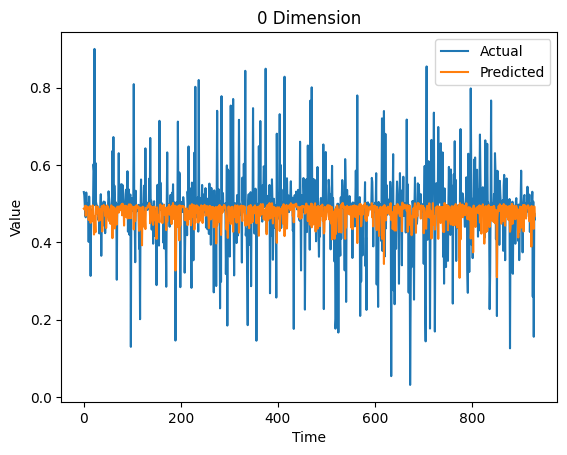

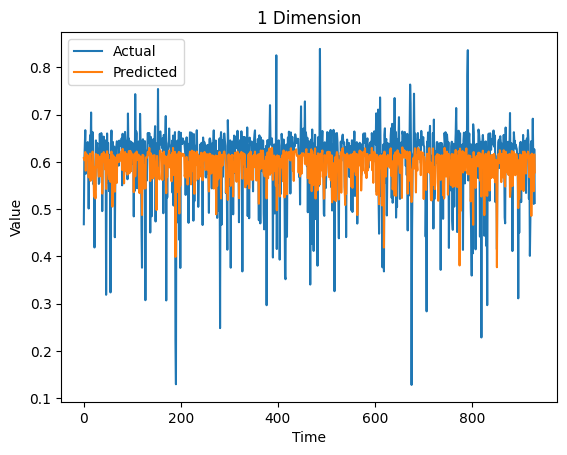

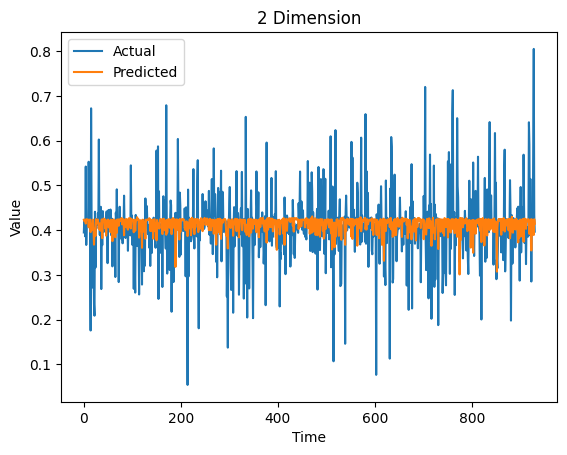

Enter interval for plotting (in seconds): 10
30/30 [==============================] - 0s 5ms/step


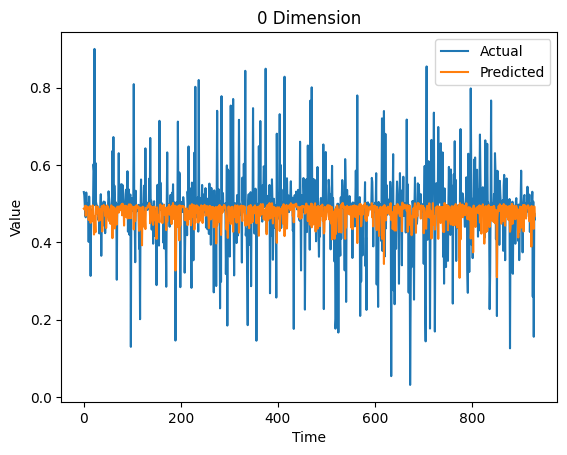

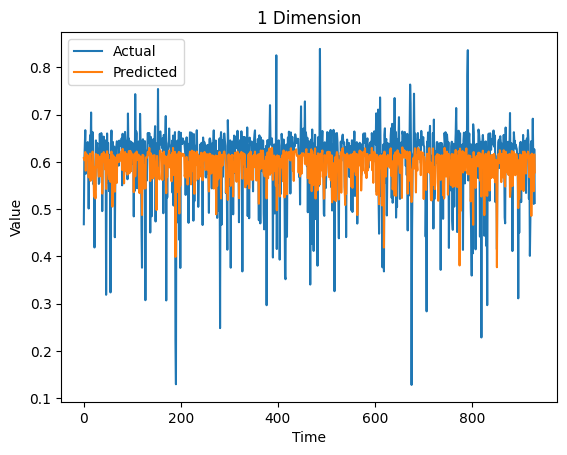

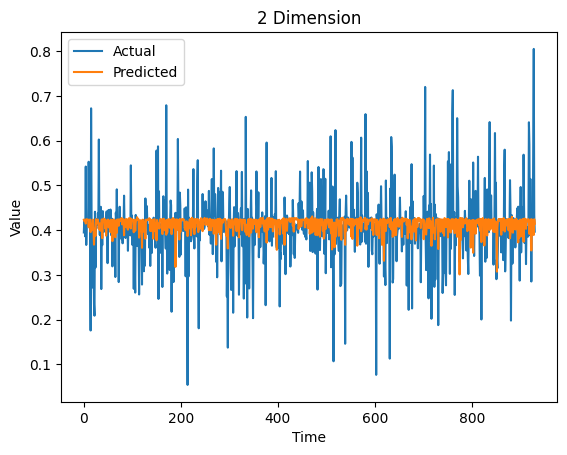

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


data = pd.read_csv("orientation_database-orientation_data.csv")
X = data[['x', 'y', 'z']].values
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)


def create_dataset(X, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(X[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10


X_time, y_time = create_dataset(X_scaled, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=3))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)


loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


y_pred = model.predict(X_test)


def plot_results(actual, predicted, dimension):
    plt.plot(actual[:, dimension], label='Actual')
    plt.plot(predicted[:, dimension], label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{dimension} Dimension')
    plt.legend()
    plt.show()

# Plot for x dimension
plot_results(y_test, y_pred, 0)

# Plot for y dimension
plot_results(y_test, y_pred, 1)

# Plot for z dimension
plot_results(y_test, y_pred, 2)


interval = int(input("Enter interval for plotting (in seconds): "))
time_steps_interval = interval // 1

X_interval, y_interval = create_dataset(X_scaled, time_steps_interval)
X_train_interval, X_test_interval, y_train_interval, y_test_interval = train_test_split(X_interval, y_interval, test_size=0.2, random_state=42)

y_pred_interval = model.predict(X_test_interval)

plot_results(y_test_interval, y_pred_interval, 0)
plot_results(y_test_interval, y_pred_interval, 1)
plot_results(y_test_interval, y_pred_interval, 2)


history = model.history.history

